In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# %matploblib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6


In [2]:
dataset = pd.read_csv('/Users/dougehlert/Downloads/s8dj4edjf84hd8fcvn3d/teleco_time_series .csv')
dataset['Day']= pd.to_datetime(dataset['Day'],unit='D', origin=pd.Timestamp('2019-01-01'))


indexedDataset = dataset.set_index(['Day'])


In [3]:
print(indexedDataset.shape)

(731, 1)


In [4]:
from datetime import datetime
indexedDataset.head(5)

,Revenue
Day,
2019-01-02,0.000000
2019-01-03,0.000793
2019-01-04,0.825542
2019-01-05,0.320332
2019-01-06,1.082554


In [5]:
dataset.isna().sum().sum()

0

In [6]:
indexedDataset_train = indexedDataset.loc[: '2020-09-30']
indexedDataset_test = indexedDataset.loc['2020-10-01' :]
print('X_train Shape', indexedDataset_train.shape)
print('X_test Shape', indexedDataset_test.shape)
indexedDataset_train.to_csv('/Users/dougehlert/desktop/indexDataset_train-213.csv', index=False)
indexedDataset_test.to_csv('/Users/dougehlert/desktop/indexDataset_test-213.csv', index=False)

X_train Shape (638, 1)
X_test Shape (93, 1)


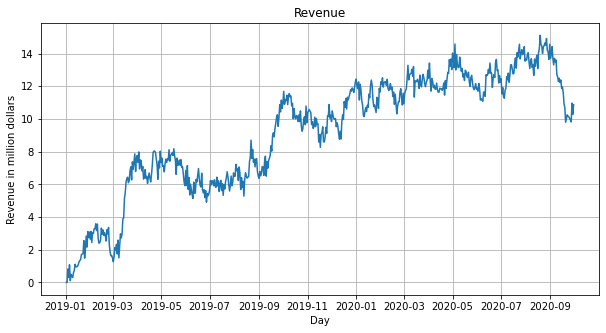

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(indexedDataset_train.Revenue)
plt.title('Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue in million dollars')
plt.grid(True)
plt.show()


In [8]:
indexedDataset_train.dropna()
rolmean = indexedDataset_train.rolling(window=12).mean() # Monthly level
rolstd = indexedDataset_train.rolling(window=12).std()
print (rolmean, rolstd)

              Revenue
Day                  
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-05        NaN
2019-01-06        NaN
...               ...
2020-09-26  10.617222
2020-09-27  10.446886
2020-09-28  10.364133
2020-09-29  10.252867
2020-09-30  10.248688

[638 rows x 1 columns]              Revenue
Day                 
2019-01-02       NaN
2019-01-03       NaN
2019-01-04       NaN
2019-01-05       NaN
2019-01-06       NaN
...              ...
2020-09-26  0.787902
2020-09-27  0.711271
2020-09-28  0.561281
2020-09-29  0.400330
2020-09-30  0.392899

[638 rows x 1 columns]


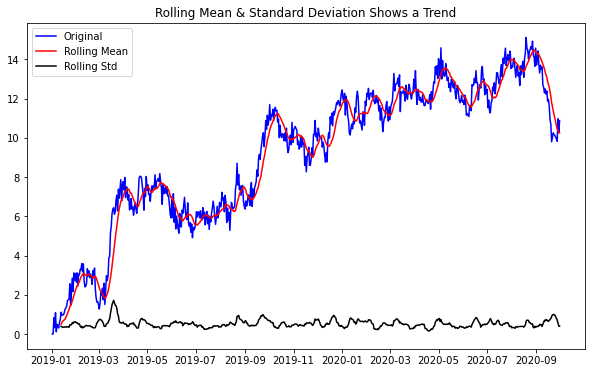

In [9]:
orig = plt.plot(indexedDataset_train, color='blue', label='Original')
mean = plt.plot(rolmean, scalex=True, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Shows a Trend')
plt.show(block=False)

In [10]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test: ')

dftest = adfuller(indexedDataset_train['Revenue'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No. of Observations'])

for key,value in dftest[4].items():
	dfoutput['Critical Value (%s) '%key] = value # Critical Values should always be more than the test statistic

print(dfoutput)

#critical values are less then test statistic AND the p-value leads to the conclusion that the null hypothese CANNOT
    #be rejected.  

Results of Dickey-Fuller test: 
Test Statistic            -2.544497
p-value                    0.105019
#Lags Used                 1.000000
No. of Observations      636.000000
Critical Value (1%)       -3.440674
Critical Value (5%)       -2.866095
Critical Value (10%)      -2.569196
dtype: float64


In [11]:
#Differencing to eliminate stationarity/seasonality:
indexedDataset_train["diff_1"] = indexedDataset_train['Revenue'].diff(periods=1)

In [12]:
print(indexedDataset_train)

              Revenue    diff_1
Day                            
2019-01-02   0.000000       NaN
2019-01-03   0.000793  0.000793
2019-01-04   0.825542  0.824749
2019-01-05   0.320332 -0.505210
2019-01-06   1.082554  0.762222
...               ...       ...
2020-09-26   9.946258 -0.091918
2020-09-27   9.819163 -0.127095
2020-09-28  10.966138  1.146975
2020-09-29  10.278450 -0.687688
2020-09-30  10.872165  0.593714

[638 rows x 2 columns]


In [13]:
indexedDataset_train.isna().sum().sum()

1

In [14]:
indexedDataset_train.dropna(inplace=True)

In [15]:
indexedDataset_train.isna().sum().sum()

0

In [16]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test: ')

dftest = adfuller(indexedDataset_train['diff_1'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No. of Observations'])

for key,value in dftest[4].items():
	dfoutput['Critical Value (%s) '%key] = value # Critical Values should always be more than the test statistic

print(dfoutput)
#p-value is now 0, which indicates perfect stationarity

Results of Dickey-Fuller test: 
Test Statistic           -41.080937
p-value                    0.000000
#Lags Used                 0.000000
No. of Observations      636.000000
Critical Value (1%)       -3.440674
Critical Value (5%)       -2.866095
Critical Value (10%)      -2.569196
dtype: float64


In [17]:
indexedDataset_train.isna().sum().sum()

0

In [18]:
print(indexedDataset_train.shape)

(637, 2)


In [ ]:
indexedDataset_train = pd.read_csv('/Users/dougehlert/desktop/indexDataset_train-diffed-213.csv')

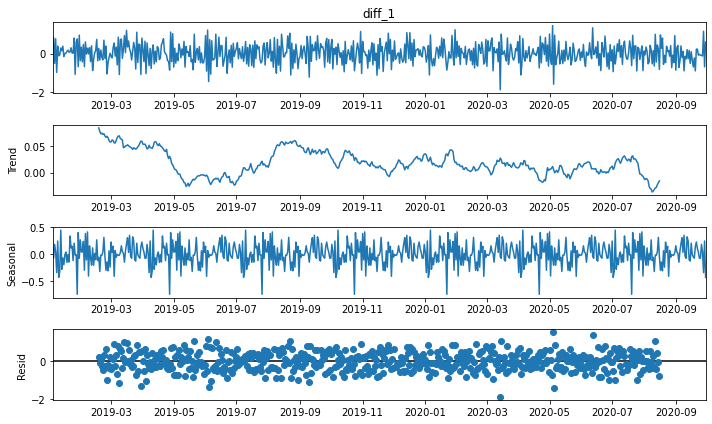

<AxesSubplot:title={'center':'Trend'}, xlabel='Day'>

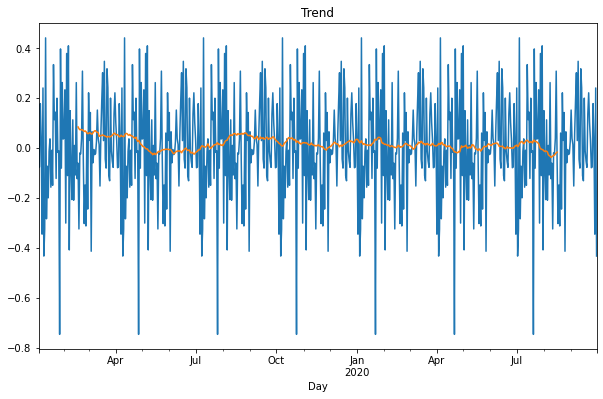

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Decompose Time Series
decomp = seasonal_decompose(indexedDataset_train['diff_1'], period=90)
decomp.plot() # Plot decomposition 
plt.show() # Check  for seasonality in the data

#Plot the Seasonality
plt.title('Seasonality')
decomp.seasonal.plot()

#Plot the trend
plt.title('Trend')
decomp.trend.plot()

<AxesSubplot:title={'center':'Residuals'}, xlabel='Day'>

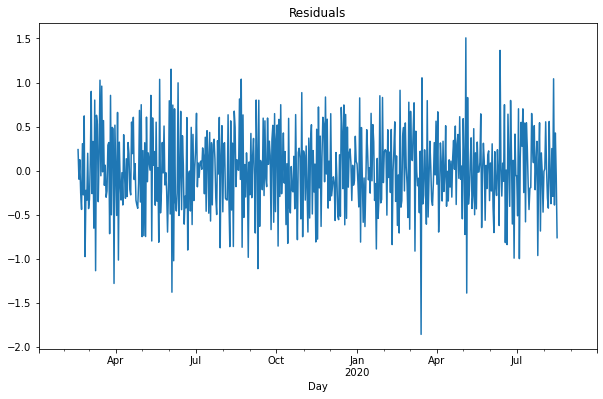

In [20]:
#Python Code to plot the residual
plt.title('Residuals')
decomp.resid.plot()


In [21]:
from pmdarima import auto_arima      
stepwise_fit=auto_arima(indexedDataset_train['diff_1'],trace=True)
stepwise_fit.summary()
#best fit is (1,0,0) -- (0,0,0)[0] demonstrates no seasonality

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=849.940, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=990.877, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=845.820, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=874.381, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=989.550, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=847.765, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=847.775, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=849.047, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=845.551, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=847.461, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=847.478, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=874.373, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=848.504, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.475 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  637
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -420.775
Date:                Sun, 13 Nov 2022   AIC                            845.551
Time:                        17:01:10   BIC                            854.464
Sample:                    01-03-2019   HQIC                           849.011
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4526      0.035    -12.911      0.000      -0.521      -0.384
sigma2         0.2193      0.013     16.570      0.000       0.193       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

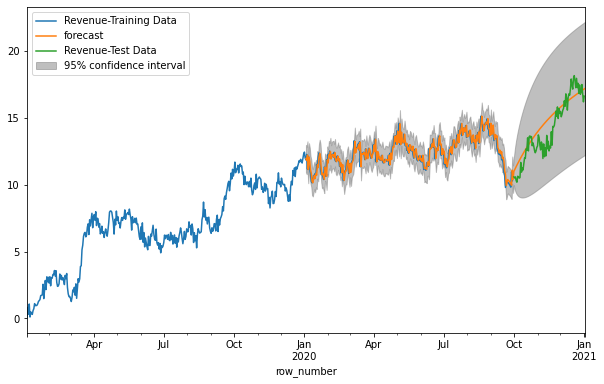

In [22]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import warnings
warnings.filterwarnings("ignore")
# Forecast Revenues using an ARIMA(1,0,0) model
mod = ARIMA(indexedDataset_train['Revenue'], trend='t', order=(1,0,0))
res = mod.fit()
# Plot the original series and the forecasted series
fig, ax = plt.subplots()
indexedDataset_train['Revenue'].plot(label = 'Revenue-Training Data', ax=ax)
plot_predict(res, start='2020-01-03', end='2021-01-02', ax=ax)
#plot the test data, since the test data was exported as an indexed dataframe, we will create a row number column and
    #use it to index/create the date field
indexedDataset_test = pd.read_csv('/Users/dougehlert/desktop/indexDataset_test-213.csv')
indexedDataset_test['row_number'] = indexedDataset_test.reset_index().index
indexedDataset_test['row_number']= pd.to_datetime(indexedDataset_test['row_number'],unit='D', origin=pd.Timestamp('2020-10-01'))
indexedDataset_test = indexedDataset_test.set_index(['row_number'])
indexedDataset_test['Revenue'].plot(label='Revenue-Test Data',ax=ax)
plt.legend(loc='upper left')
plt.show()

In [23]:
prediction = res.predict(start='2020-10-01', end='2021-01-01', exog=None, dynamic=False)



In [24]:
print(prediction)

2020-10-01    10.994632
2020-10-02    11.115035
2020-10-03    11.233417
2020-10-04    11.349821
2020-10-05    11.464288
                ...    
2020-12-28    17.000865
2020-12-29    17.040021
2020-12-30    17.078866
2020-12-31    17.117406
2021-01-01    17.155649
Freq: D, Name: predicted_mean, Length: 93, dtype: float64


In [25]:
from sklearn import metrics
print(metrics.mean_squared_error(indexedDataset_test['Revenue'], prediction))

1.1522441399006123
